In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class logistic_reg():
    
    def __init__(self, learning_rate = 0.00001, no_of_iteration = 700, concerned_class = 0):
        
        # Initializing Values!
        
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration
        self.concerned_class = concerned_class
        self.no_of_example = 0
        self.cst = 0
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
        
    
    def cost_func(self, y_pred, Y_train):
     
        # Using 'One Vs. All method'!
        # Labelling the 'concerned_class' target values as '1' and all other classes as '0'.

        Y = [1 if Y_train[i] == self.concerned_class else 0 for i in range(self.no_of_example)]
        Y = np.array(Y)
        for i in range(len(y_pred)):
          if y_pred[i]==1:
            y_pred[i] -= 1e-4   
        cost = ( -1*sum( Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred) ) )/self.no_of_example
        return cost
    
    def train(self, X_train, Y_train):
        self.no_of_example, no_of_feature = X_train.shape
        
        # Initializing constant and weight to be passed as a parameter to 'sigmoid()'!
        
        self.const = 0
        self.weight = [0 for i in range(no_of_feature)]
        Y = [1 if Y_train[i] == self.concerned_class else 0 for i in range(self.no_of_example)]
        Y = np.array(Y)
        
        # Making cst's dimension equal to the number of iterations!
        
        self.cst = np.zeros(self.no_of_iteration)
        
        # Applying Gradient Descent.
        
        for i in range(self.no_of_iteration):        
            z = self.const + np.dot(X_train, self.weight)
            y_pred = self.sigmoid(z)
            
            # Calculating gradients with respect to constant and weights.
            
            dc = sum(y_pred - Y)
            dw = np.dot(X_train.T, (y_pred - Y))
            
            # Updating parameters.
            
            self.const -= (self.learning_rate / self.no_of_example)*dc
            self.weight -= (self.learning_rate / self.no_of_example)*dw   
            self.cst[i] = self.cost_func(y_pred, Y_train)    
            
    def predict(self, X_test, Y_test):
        
        # This function predicts the output corresponding to the given test data.
        
        sz = len(Y_test)
        z = self.const + np.dot(X_test, self.weight)
        pred = self.sigmoid(z)
        Y = [1 if Y_test[i] == self.concerned_class else 0 for i in range(sz)]
        Y = np.array(Y)
        
        # Predict the class as positive class if 'pred' gives a value greater than '0.5',
        # else predict the class as negative class!
        
        Y_pred = [1 if i >= 0.5 else 0 for i in pred]
        Y_pred = np.array(Y_pred)
        return Y_pred
    
    def accuracy(self, X_test, Y_test):
        
        # This function calculates the accuracy of predicted values.
        
        sz = len(Y_test)
        sum = 0
        Y_pred = self.predict(X_test, Y_test)
        Y = [1 if Y_test[i] == self.concerned_class else 0  for i in range(sz)]
        Y = np.array(Y)
        for i in range(sz):
            if Y[i] == Y_pred[i]:
                sum += 1
        return print("Accuracy of prediction for ' Class = ", self.concerned_class,
                     "' is :", (sum/sz)*100, "%")
        
    def learning_curve(self):
        
        # This function plots a learning curve viz. plot of 'Number of iterations' Vs. 'Cross 
        # Entropy Loss'.
    
        iter = [(i + 1) for i in range(self.no_of_iteration)]
        iter = np.array(iter)
        plt.plot(iter, self.cst, label = self.concerned_class)
        plt.title('Learning Curve')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost Entropy Loss')
        plt.legend(title = 'Classes', fancybox = True, shadow = True, ncol = 2, borderpad = 1)
        plt.show
        
            
    

Accuracy of prediction for ' Class =  0 ' is : 99.20992099209921 %
Accuracy of prediction for ' Class =  1 ' is : 99.28992899289929 %
Accuracy of prediction for ' Class =  2 ' is : 97.999799979998 %
Accuracy of prediction for ' Class =  3 ' is : 97.44974497449745 %
Accuracy of prediction for ' Class =  4 ' is : 98.02980298029803 %
Accuracy of prediction for ' Class =  5 ' is : 97.2997299729973 %
Accuracy of prediction for ' Class =  6 ' is : 98.45984598459846 %
Accuracy of prediction for ' Class =  7 ' is : 98.44984498449844 %
Accuracy of prediction for ' Class =  8 ' is : 94.31943194319432 %
Accuracy of prediction for ' Class =  9 ' is : 96.06960696069608 %


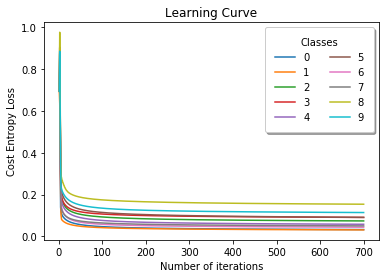

In [120]:
training_data = pd.read_csv("sample_data/mnist_train_small.csv")
testing_data = pd.read_csv("sample_data/mnist_test.csv")
testing_data.head()
xtrain = training_data.drop('6', axis = 1)
ytrain = training_data['6'].values
xtest = testing_data.drop('7', axis = 1)
ytest = testing_data['7'].values
for i in range(10):
  reg = logistic_reg(concerned_class = i)
  reg.train(xtrain, ytrain)
  reg.accuracy(xtest, ytest)
  reg.learning_curve()